In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

# Column names
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Load the data
banknote_df = pd.read_csv(url, header=None, names=columns)

# The first four columns are the features
features = ['variance', 'skewness', 'curtosis', 'entropy']
X = banknote_df[features]

# The last column ('class') is the target variable
y = banknote_df['class']

print("--- Features (X) ---")
print(X.head())

print("\n--- Target (y) ---")
print(y.head())

--- Features (X) ---
   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880

--- Target (y) ---
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


In [30]:

# 1. Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# 2. Scale the sets separately
scaler = StandardScaler()
# Use fit_transform on the training data ONLY
X_train_scaled = scaler.fit_transform(X_train)
# Use ONLY transform on the test data
X_test_scaled = scaler.transform(X_test)
print(f"\nData split into {X_train_scaled.shape[0]} training samples and {X_test_scaled.shape[0]} testing samples.")


Data split into 960 training samples and 412 testing samples.


/tmp/ipython-input-41-2711057379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


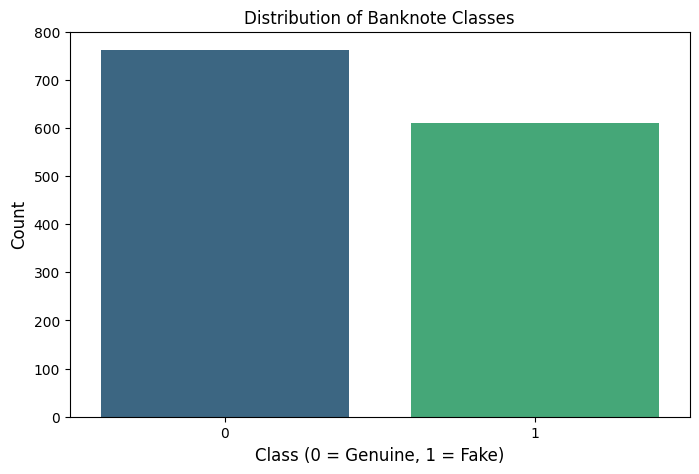

In [41]:
# 1. Get the counts for the 'class' column (0 for genuine, 1 for fake)
class_counts = banknote_df['class'].value_counts()

# 2. Create the plot using keyword arguments x and y
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# 3. Set correct labels
plt.title('Distribution of Banknote Classes')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class (0 = Genuine, 1 = Fake)', fontsize=12)
plt.xticks(ticks=[0, 1]) # Ensure x-axis ticks are set to 0 and 1
plt.show()

In [27]:
from sklearn.neural_network import MLPClassifier

# We define the model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, random_state=42)

# We train model
mlp.fit(X_train, y_train)


# We predict target values
prediction = mlp.predict(X_test)

In [28]:
test_acc_mlp = round(mlp.fit(X_train,y_train).score(X_test, y_test)* 100, 2)
train_acc_mlp = round(mlp.fit(X_train, y_train).score(X_train, y_train)* 100, 2)

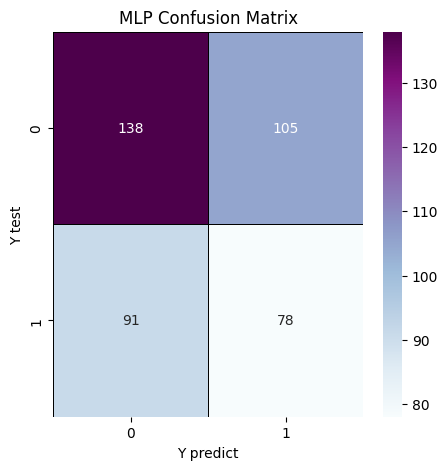

In [31]:

mlp_cm = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [32]:
# # Print the full classification report
# print("\n--- Overall Model Results ---")
# report = classification_report(y_test, y_pred)
# print(report)
model1 = pd.DataFrame({
    'Model': ['MLP'],
    'Train Score': [train_acc_mlp],
    'Test Score': [test_acc_mlp]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,MLP,100.0,100.0


In [33]:
# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"--- Accuracy ---")
# print(f"Model Accuracy: {accuracy:.4f} or {accuracy*100:.2f}%")
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.42


In [34]:
# Calculate and print precision and recall
# For binary classification, 'binary' is the default for average
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f"\n--- Precision and Recall ---")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")


--- Precision and Recall ---
Precision: 0.4262
Recall:    0.4615


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.42')

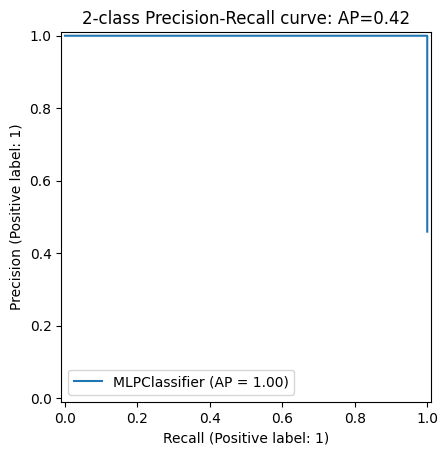

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(mlp,X_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))